# House Price Prediction Regression - TensorFlow

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

## Importing the Data

In [2]:
df = pd.read_csv('house_data.csv') 
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [29]:
print(convert_label_actual(-0.339584))

13559


In [3]:
df.tail()

,date,age,distance,stores,latitude,longitude,price
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313
4999,2018,9,1,9,90,127,12770


In [4]:
df.shape

(5000, 7)

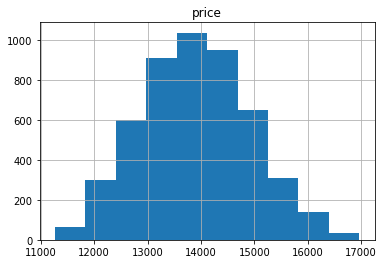

In [5]:
df.hist("price")
plt.show()

## Check Missing Values

In [6]:
df.isna()

,date,age,distance,stores,latitude,longitude,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [7]:
df.isna().sum()

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

## Data Normalization

In [8]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,age,distance,stores,latitude,longitude,price
0,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## Select X Labels

In [9]:
X = df_norm.iloc[:, :5]
X.head()

,age,distance,stores,latitude,longitude
0,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.534444,0.006938,0.981581,-1.255981,-0.945141


## Select Y Labels

In [10]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## Feature and Label Values

In [11]:
X_arr = X.values
Y_arr = Y.values

In [25]:
X_arr

array([[ 0.18138426,  1.25700164,  0.34522379, -0.30721158, -1.26079862],
       [-1.31911814, -0.93060999, -0.60931203,  0.32530146, -1.26079862],
       [-0.08341028, -0.61809404,  0.66340239,  1.59032754, -1.57645598],
       ...,
       [-1.14258845,  1.56951759,  0.02704518,  1.59032754,  0.00183081],
       [ 1.59362182, -0.61809404,  0.02704518, -1.25598114,  0.94880289],
       [-0.87779391, -1.24312594,  1.2997596 ,  1.59032754,  0.63314553]])

In [26]:
Y_arr

array([ 0.35008836, -1.83648583, -0.33958379, ...,  0.19138539,
        0.39809111, -1.11350566])

## Train and Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.01, shuffle = True, random_state=1)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4950, 5)
y_train shape:  (4950,)
X_test shape:  (50, 5)
y_test shape:  (50,)


## Create the Model

In [13]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

In [14]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [15]:
model = get_model()

# this prediction is before training the model
preds_on_untrained = model.predict(X_test)

In [16]:
# Train model and store in the object history
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000
)

Epoch 1/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.9445 - val_loss: 0.6600
Epoch 2/1000
155/155 [==============================] - 0s 571us/step - loss: 0.9421 - val_loss: 0.6589
Epoch 3/1000
155/155 [==============================] - 0s 586us/step - loss: 0.9399 - val_loss: 0.6578
Epoch 4/1000
155/155 [==============================] - 0s 592us/step - loss: 0.9377 - val_loss: 0.6567
Epoch 5/1000
155/155 [==============================] - 0s 579us/step - loss: 0.9356 - val_loss: 0.6556
Epoch 6/1000
155/155 [==============================] - 0s 573us/step - loss: 0.9334 - val_loss: 0.6544
Epoch 7/1000
155/155 [==============================] - 0s 572us/step - loss: 0.9313 - val_loss: 0.6533
Epoch 8/1000
155/155 [==============================] - 0s 565us/step - loss: 0.9292 - val_loss: 0.6522
Epoch 9/1000
155/155 [==============================] - 0s 589us/step - loss: 0.9271 - val_loss: 0.6511
Epoch 10/1000
155/155 [==============================] - 0s 541us/

155/155 [==============================] - 0s 939us/step - loss: 0.7928 - val_loss: 0.5788
Epoch 80/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7911 - val_loss: 0.5779
Epoch 81/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7893 - val_loss: 0.5769
Epoch 82/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7875 - val_loss: 0.5759
Epoch 83/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7857 - val_loss: 0.5749
Epoch 84/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7840 - val_loss: 0.5740
Epoch 85/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7822 - val_loss: 0.5730
Epoch 86/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.7805 - val_loss: 0.5721
Epoch 87/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7788 - val_loss: 0.5712
Epoch 88/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.7771 -

Epoch 158/1000
155/155 [==============================] - 0s 905us/step - loss: 0.6646 - val_loss: 0.5106
Epoch 159/1000
155/155 [==============================] - 0s 572us/step - loss: 0.6631 - val_loss: 0.5098
Epoch 160/1000
155/155 [==============================] - 0s 871us/step - loss: 0.6616 - val_loss: 0.5090
Epoch 161/1000
155/155 [==============================] - 0s 837us/step - loss: 0.6600 - val_loss: 0.5082
Epoch 162/1000
155/155 [==============================] - 0s 965us/step - loss: 0.6585 - val_loss: 0.5073
Epoch 163/1000
155/155 [==============================] - 0s 889us/step - loss: 0.6569 - val_loss: 0.5065
Epoch 164/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.6554 - val_loss: 0.5057
Epoch 165/1000
155/155 [==============================] - 0s 740us/step - loss: 0.6538 - val_loss: 0.5049
Epoch 166/1000
155/155 [==============================] - 0s 971us/step - loss: 0.6523 - val_loss: 0.5041
Epoch 167/1000
155/155 [========================

155/155 [==============================] - 0s 838us/step - loss: 0.5500 - val_loss: 0.4416
Epoch 236/1000
155/155 [==============================] - 0s 884us/step - loss: 0.5485 - val_loss: 0.4407
Epoch 237/1000
155/155 [==============================] - 0s 785us/step - loss: 0.5471 - val_loss: 0.4398
Epoch 238/1000
155/155 [==============================] - 0s 831us/step - loss: 0.5457 - val_loss: 0.4389
Epoch 239/1000
155/155 [==============================] - 0s 878us/step - loss: 0.5443 - val_loss: 0.4380
Epoch 240/1000
155/155 [==============================] - 0s 909us/step - loss: 0.5429 - val_loss: 0.4371
Epoch 241/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.5415 - val_loss: 0.4362
Epoch 242/1000
155/155 [==============================] - 0s 981us/step - loss: 0.5401 - val_loss: 0.4353
Epoch 243/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.5387 - val_loss: 0.4344
Epoch 244/1000
155/155 [==============================] - 0s 966u

Epoch 313/1000
155/155 [==============================] - 0s 891us/step - loss: 0.4469 - val_loss: 0.3732
Epoch 314/1000
155/155 [==============================] - 0s 889us/step - loss: 0.4456 - val_loss: 0.3723
Epoch 315/1000
155/155 [==============================] - 0s 835us/step - loss: 0.4444 - val_loss: 0.3715
Epoch 316/1000
155/155 [==============================] - 0s 894us/step - loss: 0.4432 - val_loss: 0.3707
Epoch 317/1000
155/155 [==============================] - 0s 985us/step - loss: 0.4420 - val_loss: 0.3699
Epoch 318/1000
155/155 [==============================] - 0s 939us/step - loss: 0.4408 - val_loss: 0.3690
Epoch 319/1000
155/155 [==============================] - 0s 869us/step - loss: 0.4396 - val_loss: 0.3682
Epoch 320/1000
155/155 [==============================] - 0s 954us/step - loss: 0.4384 - val_loss: 0.3674
Epoch 321/1000
155/155 [==============================] - 0s 865us/step - loss: 0.4371 - val_loss: 0.3666
Epoch 322/1000
155/155 [======================

155/155 [==============================] - 0s 794us/step - loss: 0.3608 - val_loss: 0.3130
Epoch 391/1000
155/155 [==============================] - 0s 895us/step - loss: 0.3598 - val_loss: 0.3123
Epoch 392/1000
155/155 [==============================] - 0s 947us/step - loss: 0.3588 - val_loss: 0.3116
Epoch 393/1000
155/155 [==============================] - 0s 919us/step - loss: 0.3579 - val_loss: 0.3108
Epoch 394/1000
155/155 [==============================] - 0s 856us/step - loss: 0.3569 - val_loss: 0.3101
Epoch 395/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.3559 - val_loss: 0.3094
Epoch 396/1000
155/155 [==============================] - 0s 890us/step - loss: 0.3549 - val_loss: 0.3087
Epoch 397/1000
155/155 [==============================] - 0s 844us/step - loss: 0.3540 - val_loss: 0.3080
Epoch 398/1000
155/155 [==============================] - 0s 910us/step - loss: 0.3530 - val_loss: 0.3073
Epoch 399/1000
155/155 [==============================] - 0s 95

155/155 [==============================] - 0s 834us/step - loss: 0.2972 - val_loss: 0.2663
Epoch 468/1000
155/155 [==============================] - 0s 820us/step - loss: 0.2965 - val_loss: 0.2658
Epoch 469/1000
155/155 [==============================] - 0s 848us/step - loss: 0.2958 - val_loss: 0.2653
Epoch 470/1000
155/155 [==============================] - 0s 854us/step - loss: 0.2952 - val_loss: 0.2648
Epoch 471/1000
155/155 [==============================] - 0s 845us/step - loss: 0.2945 - val_loss: 0.2644
Epoch 472/1000
155/155 [==============================] - 0s 863us/step - loss: 0.2939 - val_loss: 0.2639
Epoch 473/1000
155/155 [==============================] - 0s 806us/step - loss: 0.2933 - val_loss: 0.2634
Epoch 474/1000
155/155 [==============================] - 0s 885us/step - loss: 0.2926 - val_loss: 0.2629
Epoch 475/1000
155/155 [==============================] - 0s 819us/step - loss: 0.2920 - val_loss: 0.2624
Epoch 476/1000
155/155 [==============================] - 0s 

155/155 [==============================] - 0s 859us/step - loss: 0.2552 - val_loss: 0.2346
Epoch 545/1000
155/155 [==============================] - 0s 867us/step - loss: 0.2547 - val_loss: 0.2342
Epoch 546/1000
155/155 [==============================] - 0s 894us/step - loss: 0.2543 - val_loss: 0.2339
Epoch 547/1000
155/155 [==============================] - 0s 802us/step - loss: 0.2539 - val_loss: 0.2336
Epoch 548/1000
155/155 [==============================] - 0s 831us/step - loss: 0.2534 - val_loss: 0.2332
Epoch 549/1000
155/155 [==============================] - 0s 843us/step - loss: 0.2530 - val_loss: 0.2329
Epoch 550/1000
155/155 [==============================] - 0s 861us/step - loss: 0.2526 - val_loss: 0.2326
Epoch 551/1000
155/155 [==============================] - 0s 899us/step - loss: 0.2522 - val_loss: 0.2323
Epoch 552/1000
155/155 [==============================] - 0s 851us/step - loss: 0.2518 - val_loss: 0.2320
Epoch 553/1000
155/155 [==============================] - 0s 

155/155 [==============================] - 0s 836us/step - loss: 0.2288 - val_loss: 0.2138
Epoch 622/1000
155/155 [==============================] - 0s 837us/step - loss: 0.2285 - val_loss: 0.2136
Epoch 623/1000
155/155 [==============================] - 0s 868us/step - loss: 0.2282 - val_loss: 0.2134
Epoch 624/1000
155/155 [==============================] - 0s 862us/step - loss: 0.2280 - val_loss: 0.2131
Epoch 625/1000
155/155 [==============================] - 0s 936us/step - loss: 0.2277 - val_loss: 0.2129
Epoch 626/1000
155/155 [==============================] - 0s 843us/step - loss: 0.2274 - val_loss: 0.2127
Epoch 627/1000
155/155 [==============================] - 0s 839us/step - loss: 0.2272 - val_loss: 0.2125
Epoch 628/1000
155/155 [==============================] - 0s 907us/step - loss: 0.2269 - val_loss: 0.2123
Epoch 629/1000
155/155 [==============================] - 0s 853us/step - loss: 0.2267 - val_loss: 0.2121
Epoch 630/1000
155/155 [==============================] - 0s 

Epoch 699/1000
155/155 [==============================] - 0s 959us/step - loss: 0.2119 - val_loss: 0.2012
Epoch 700/1000
155/155 [==============================] - 0s 736us/step - loss: 0.2117 - val_loss: 0.2011
Epoch 701/1000
155/155 [==============================] - 0s 786us/step - loss: 0.2115 - val_loss: 0.2009
Epoch 702/1000
155/155 [==============================] - 0s 953us/step - loss: 0.2114 - val_loss: 0.2008
Epoch 703/1000
155/155 [==============================] - 0s 1ms/step - loss: 0.2112 - val_loss: 0.2007
Epoch 704/1000
155/155 [==============================] - 0s 944us/step - loss: 0.2110 - val_loss: 0.2006
Epoch 705/1000
155/155 [==============================] - 0s 903us/step - loss: 0.2109 - val_loss: 0.2004
Epoch 706/1000
155/155 [==============================] - 0s 950us/step - loss: 0.2107 - val_loss: 0.2003
Epoch 707/1000
155/155 [==============================] - 0s 937us/step - loss: 0.2105 - val_loss: 0.2002
Epoch 708/1000
155/155 [========================

155/155 [==============================] - 0s 1ms/step - loss: 0.2011 - val_loss: 0.1934
Epoch 777/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2010 - val_loss: 0.1934
Epoch 778/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2009 - val_loss: 0.1933
Epoch 779/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2008 - val_loss: 0.1932
Epoch 780/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2007 - val_loss: 0.1931
Epoch 781/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2006 - val_loss: 0.1930
Epoch 782/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2004 - val_loss: 0.1930
Epoch 783/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2003 - val_loss: 0.1929
Epoch 784/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.2002 - val_loss: 0.1928
Epoch 785/1000
155/155 [==============================] - 0s 2ms/step - loss: 0

155/155 [==============================] - 0s 913us/step - loss: 0.1936 - val_loss: 0.1878
Epoch 855/1000
155/155 [==============================] - 0s 897us/step - loss: 0.1935 - val_loss: 0.1877
Epoch 856/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1934 - val_loss: 0.1877
Epoch 857/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1933 - val_loss: 0.1876
Epoch 858/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1932 - val_loss: 0.1875
Epoch 859/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1931 - val_loss: 0.1875
Epoch 860/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1931 - val_loss: 0.1874
Epoch 861/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1930 - val_loss: 0.1873
Epoch 862/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1929 - val_loss: 0.1873
Epoch 863/1000
155/155 [==============================] - 0s 2ms/step - los

155/155 [==============================] - 0s 2ms/step - loss: 0.1879 - val_loss: 0.1831
Epoch 933/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1878 - val_loss: 0.1831
Epoch 934/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1878 - val_loss: 0.1830
Epoch 935/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1877 - val_loss: 0.1830
Epoch 936/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1876 - val_loss: 0.1829
Epoch 937/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1876 - val_loss: 0.1829
Epoch 938/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1875 - val_loss: 0.1828
Epoch 939/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1875 - val_loss: 0.1828
Epoch 940/1000
155/155 [==============================] - 0s 2ms/step - loss: 0.1874 - val_loss: 0.1827
Epoch 941/1000
155/155 [==============================] - 0s 2ms/step - loss: 0

## Plot Training and Validation Loss

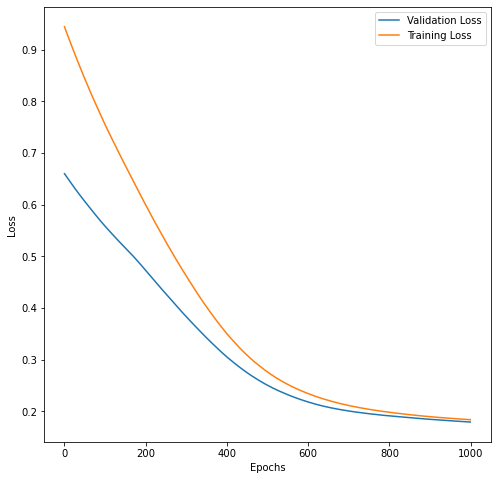

In [17]:
# plot history
plot_loss(history)

## Predictions

In [18]:
# make predictions on the trained model
preds_on_trained = model.predict(X_test)

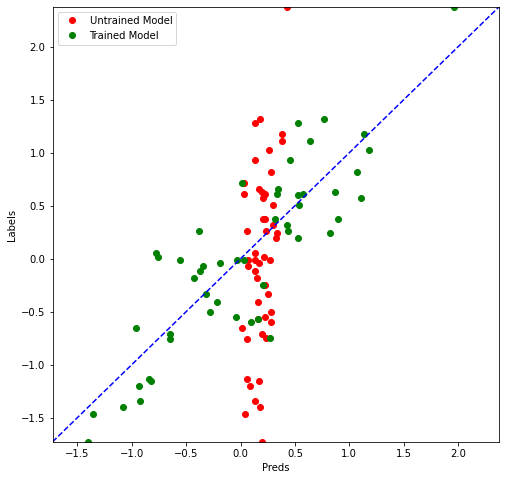

In [19]:
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

## Convert Label Value

In [28]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_actual(pred):
    return int(pred * y_std + y_mean)

print(convert_label_actual(-1.836486))

12031


## Price Predictions

In [22]:
price_on_untrained = [convert_label_actual(y) for y in preds_on_untrained]
price_on_trained = [convert_label_actual(y) for y in preds_on_trained]
price_y_test = [convert_label_actual(y) for y in y_test]

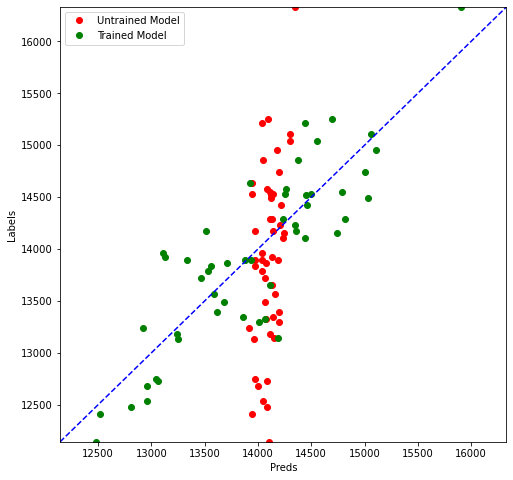

In [23]:
# plot price predictions
compare_predictions(price_on_untrained, price_on_trained, price_y_test)